# Geração de dataset para o problema de trasnporte 1D de fluidos bifásicos em meios porosos.

## Introdução
> O problema em questão é o modelo padrão de Buckley-Leverett, com dois fluidos incompressíveis e imiscíveis. Considerando que os fluidos são $o$ e $w$, a permeabilidade e a porosidade do meio são as funções $k(x)$ e $\phi(x)$, respectivamente, e são desprezíveis os efeitos de gravidade e capilaridade, a pressão $p$ e a saturação dos fluidos $S_w(x,t)$ e $S_o(x,t)$ são dados por um sistema combinando as equações de balanço de massa e a equação de Darcy para cada fase (Fuks e Tchelepi, 2020). A equação abaixo modela esse problema em uma dimensão:
$$\phi(x)\dfrac{\partial S_w}{\partial t} + u_{tot}\dfrac{\partial f_w(S_w)}{\partial x}=0$$.

> Na equação acima, $u_{tot}=u_w+u_o$ é a soma dos fluxos de Darcy de cada fase, e $f_w(S_w)$ é o fluxo fracional de água:
$$f_w = \dfrac{\lambda_w}{\lambda_w + \lambda_o}$$,

> Em que $\lambda_\alpha=(k\cdot k_{rw})/\mu_\alpha$ é a mobilidade de cada fase ($\alpha=o,\;w$), com $\mu_\alpha$ sendo a viscosidade da fase, e $k_{rw}(S_w)$ sendo a permeabilidade relativa de cada fase.

> Para esse problema, as equções iniciais e de fronteira são:
$$S_w(x,t)=s_{wi},\;\forall x,\; t=0\\ S_w(x,t)=s_b,\; x=0,\;t>0$$.

> Utilizando-se das variáveis adimensionais $t=[\int_0^t (u_{tot}dt')]/(\phi L)$ e $x_D=x/L$, a equação do problema e suas condições podem ser reescritas como:
$$\dfrac{\partial S_w}{\partial t_D} + \dfrac{\partial f(S_w)}{\partial x_d}=0\\
S_w(x_D,t_D)=s_{wi},\;\forall x_D,\; t_D0\\ S_w(x_D,t_D)=s_b,\; x_D=0,\;t_D>0$$

> E resolver a equação acima é equivlente a resolver essa PDE hiperbólica:
$$\dfrac{\partial u}{\partial t} + \dfrac{\partial f(u)}{\partial x}=0\\
u(x,t=0)=u_0(x)\\ u(x=0,t)=u_b(t)$$.

> Neste trabalho, são assumidas a condição inicial e de fronteira uniformes:
$$u(x,t=0)=0\\ u(x=0,t>0)=1$$.


## Caso Côncavo - diferenças finitas
> O caso côncavo da solução para essa PDE ocorre quando a permeabilidade relativa das fases $k_{r\alpha}(S_\alpha)$ é uma função linear da saturação, com a função de fluxo podendo ser reescrita como:
$$f_w(S_w)=\dfrac{S_w}{S_w + S_o\dfrac{\mu_w}{\mu_o}}$$,
Sendo $S_o = 1-S_w$ e $M=\mu_o/\mu_w$, a função $f(u)$ do problema se torna:
$$f(u) = \dfrac{u}{u + \dfrac{1-u}{M}}$$.

> Substituindo essa forma de $f(u)$ na PDE, obtém-se:
$$\dfrac{\partial u}{\partial t} + \dfrac{\partial}{\partial x}\left(\dfrac{u}{u + \dfrac{1-u}{M}}\right)=0$$.

> Com alguma manipulação algébrica, obtém-se:
$$u_t + \dfrac{M}{\left[1 + (M-1)u\right]^2}\cdot u_x = 0$$.

> Esse problema de valor inicial e de contorno pode ser facilmente resolvido com o método de diferenças finitas regressivo:
$$u_x(x_i,t)\approx\dfrac{u_i-u_{i-1}}{\Delta x}\Rightarrow u_t(x_i) \approx \dfrac{-M}{\left[1 + (M-1)u_i\right]^2}\cdot\dfrac{u_i-u_{i-1}}{\Delta x}$$

> Com a integração de Euler, pode-se então fazer:
$$u(x_i,t)\approx u(x_i,t-\Delta t) + \Delta t\cdot\dfrac{-M}{\left[1 + (M-1)u_i\right]^2}\cdot\dfrac{u_i-u_{i-1}}{\Delta x}$$

## Caso Côncavo - volumes finitos
> A solução por volumes finitos ainda depende da integração de Euler para a derivada temporal. O que muda é a aproximação da derivada espacial do fluxo:
$$\dfrac{\partial f(u_i)}{\partial x} \approx \dfrac{f(u_{i+1/2}) - f(u_{i-1/2})}{\Delta x}$$
Onde $u_i = u(x=x_i)$ é o valor de $u$ em cada nó do espaço discretizado, e $\Delta x$ é a distância entre cada nó.

> Assim, substituindo essa aproximação na PDE, e já empregando a integração de Euler:
$$u(x_i,t)\approx u(x_i,t-\Delta t) + \dfrac{\Delta t}{\Delta x}\cdot\left(\dfrac{Mu_{i-1/2}}{(M-1)u_{i-1/2} +1}-\dfrac{Mu_{i+1/2}}{(M-1)u_{i+1/2}+1}\right)$$

## Caso Côncavo - solução analítica
> Para avaliar as soluções numéicas, é posível compará-las com a slução analítica do problema, que foi dada por Fuks e Tchelepi (2020):
$$u(x,t)=\left\{\begin{aligned}
& 0,& \dfrac{x}{t}>M\\
& \dfrac{\sqrt{M\dfrac{t}{x}}-1}{M-1},& M\geq\dfrac{x}{t}\geq\dfrac{1}{M}\\
& 1,& \dfrac{1}{M}\geq\dfrac{x}{t}
\end{aligned}\right.$$

## Caso não-convexo sem termo difusivo - diferenças finitas
> Para o caso não-convexo da solução, é assumido que a permeabilidade relativa segue uma lei de potência em função da saturação, mais especificamente, segue uma relação quadrática. Dessa forma, a função $f(u)$ pode ser reescrita assim:
$$f(u) = \dfrac{u^2}{u^2 + \dfrac{(1-u)^2}{M}}$$.

> E a nova PDE é:
$$u_t + \dfrac{2Mu(1-u)}{\left[(M+1)u^2 -2u +1\right]^2}\cdot u_x = 0$$.

$$\dfrac{\partial u}{\partial t} = \dfrac{-2Mu(1-u)}{\left[(M+1)u^2 -2u +1\right]^2}\cdot \dfrac{\partial u}{\partial x}$$

> Ainda utilizando o método de diferenças finitas regressivo e integração de Euler, obtém-se:
$$u(x_i,t)\approx u(x_i,t-\Delta t) + \Delta t\cdot\dfrac{-2Mu(1-u)}{\left[(M+1)u^2 -2u +1\right]^2}\cdot\dfrac{u_i-u_{i-1}}{\Delta x}$$

> Nesse caso, vemos que a aproximação de $\partial u/\partial t$ tem, no numerador, o termo $u(1-u)$. Isso significa que, sempre que $u=0$ ou $u=1$, não será registrada mudança em $u$ após a integração de Euler. Com a condição inicial $u(x,t=0)=0$, e com a condição de cnotorno $u(x=0,t>0)=1$, o métoo de diferenças finitas se mostra estagnado, e não é capaz de resolver esse problema.

## Caso não-convexo sem termo difusivo - volumes finitos
> Novamente, o método de volumes finitos pode ser utilizado aproximando a derivada espacial da função de fluxo:
$$\dfrac{\partial f(u_i)}{\partial x} \approx \dfrac{f(u_{i+1/2}) - f(u_{i-1/2})}{\Delta x}$$

> Com isso, a interação de Euler não fica estagnada quando $u=0$ ou $u=1$, mas apenas quando $u_{i-1/2}=u_{i+1/2}$, de modo que as condições inicial e de contorno $u(x,t=0)=0$ e $u(x=0,t>0)=1$ podem ser esolvidas por esse método:
$$u(x_i,t)\approx u(x_i,t-\Delta t) + \dfrac{\Delta t}{\Delta x}\cdot\left(\dfrac{Mu^2_{i-1/2}}{Mu^2_{i-1/2} + (1-u_{i-1/2})^2}-\dfrac{Mu^2_{i+1/2}}{Mu^2_{i+1/2} + (1-u_{i+1/2})^2}\right)$$

## Caso não-convexo sem termo difusivo - solução analítica
> O caso não-convexo também possui solução anlítica, mas, diferentemente do caso côncavo, esta possui choque, também descrita por Fuks e Tchelepi (2020):
$$u(x,t)=\left\{\begin{aligned}
& 0,& \dfrac{x}{t}>f'_w(u^*)\\
& f'^{-1}_w\left(\dfrac{x}{t}\right),& f'_w(u^*)\geq\dfrac{x}{t}\geq f'_w(u=1)\\
& 1,& f'_w(u=1)\geq\dfrac{x}{t}
\end{aligned}\right.$$

> Nessa solução, $u^*$ é a posição do choque, obtida com a condição de salto de Rankine-Hugoniot:
$$f'_w(u^*) = \dfrac{f_w(u^*) - f_w(u)|_{u=0}}{u^* - u|_{u=0}}$$

> Substituindo a função de fluxo e sua deirvada na expressão acima, obtemos:
$$\dfrac{2Mu^*(1-u^*)}{\left[(M+1)u^{*2} -2u^* +1\right]^2} = \dfrac{u^{*2}}{u^{*2} + \dfrac{(1-u^*)^2}{M}}\cdot\dfrac{1}{u^*}$$

> Com alguma manipulação algébrica, e excluindo-se a solução $u^*=0$, obtemos:
$$(M^2+2M+1)u^{*4} +(-2M-2)u^{*3} +2u^* -1 =0$$

> Resolvendo essa equação polinomial, e excluindo as soluções complexas ou com $u^*<0$ e $M\leq0$, encontra-se uma única solução, dependente de M, para a posição do choque:
$$u^* = \dfrac{1}{\sqrt{M+1}}$$

> Além disso, na solução acima, $u(x,t)$ está definido em $u*\leq u<1$ pela função $f'^{-1}_w(x/t)$, que é a função inversa da primeira derivada da função de fluxo, em função da vriável de similaridade $x/t$. Por ser relativamente complexa, ela pode ser calculada numericamente no _python_ com funções de otimização (aqui foi utilizada a função _scipy.optimize.newton_). É importante notar que o resultado da avaliação numérica da função inversa depende muito do chute inicial, e, nesse caso, um chute inicial entre $u^*$ e 1, pois a natureza não-injetora de $f'_w$ faz com que haja sempre duas soluções possíveis para $f'^{-1}_w(x/t)$: uma solução menor e outra menor ou igual a $u^*$, sendo apenas a última parte da solução da PDE. 

## Caso Convexo - diferenças finitas
> O caso convexo é definido por uma função de fluxo com primeira e segunda derivadas sempre positivas no domínio do problema. Fuks e Tchelepi (2020) utilizaram $f(u)=u^2$ para demostrar esse caso.

> Aproximando a derivada espacial de $u$ por diferenças finitas e integrando no tempo por Euler, obtém-se:
$$u(x_i,t)\approx u(x_i,t-\Delta t) + \Delta t\cdot2u\cdot\dfrac{u_i-u_{i-1}}{\Delta x}$$

> Esse método também não é capaz de resolver o problema para as condições iniciais  de contorno adotadas, uma vez que $u=0$ zera a deirvada temporal, deixando o problema estacionado em $u(x,t)=0$.

## Caso Convexo - volumes finitos
> Mais uma vez, resolver por volumes finitos elimina o problema de $u_t=0$. Isso porque, nesse método, com a integração de Euler, a solução é:
$$u(x_i,t)\approx u(x_i,t-\Delta t) + \Delta t\cdot\dfrac{u^2_{i-1}-u^2_i}{\Delta x}$$

## Caso Convexo - solução analítica
> De acordo com Fuks e Tchelepi (2020), a solução analítica desse caso é simplesmente uma onda de choque se propagando com velocidade unitária:
$$u(x,t)=\left\{\begin{aligned}
& 0,& \dfrac{x}{t}>1\\
& 1,& 1\geq\dfrac{x}{t}
\end{aligned}\right.$$

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib as mpl
from matplotlib.lines import Line2D
from IPython.display import clear_output
from scipy.optimize import newton
import pandas as pd

In [3]:
mpl.rcParams['font.family'] = 'arial'
mpl.rc('font', size=9)

In [4]:
# Funcao para pular alguns frames
def skipp(lista, nn):
    ll = []
    for ii in range(0, len(lista), int(nn)):
        ll.append(ii)
    return np.array(ll)

In [5]:
# Solucao analitica
def u_an(xx, tt, cc):
    global M
    aux = xx/tt
    if cc=='ccv':
        return (np.sqrt(M/aux)-1)/(M-1)*(aux<=M)*(aux>=1/M) + 1*(aux<=1/M)
    elif cc=='ncvx1' or cc=='ncvx2':
        us = 1/np.sqrt(M+1)
        r1 = dfunc(us, 0, cc)
        r2 = 0
        ff = []
        for vv in aux:
            if vv<=r2:
                f3 = 1
            elif vv>r1:
                f3 = 0
            else:
                f3 = newton(dfunc, us, args=[vv, cc])
            ff.append(f3)
        ff = np.array(ff)
        return ff
    elif cc=='cvx1' or cc=='cvx2':
        vs = 1
        return 1*(aux<=vs)
    return 0

# Diferencas finitas
def ut_df(uu, du, ddu, cc):
    global epsilon, dx
    dif = 0
    if cc=='ncvx2' or cc=='cvx2':
        dif = epsilon*ddu/dx**2
    return -dfunc(uu,0,cc)*du + dif

# Volumes finitos
def ut_vff(uu, uu1, ddu, cc):
    global epsilon, dx
    dif = 0
    if cc=='ncvx2' or cc=='cvx2':
        dif = epsilon*ddu/dx**2
    return (func(uu1,0,cc) - func(uu,0,cc))/dx + dif
    
# Funcao de fluxo e sua derivada
def func(xx, rr, cc):
    global M
    if cc=='ccv':
        return M*xx/((M-1)*xx +1) - rr
    elif cc=='ncvx1' or cc=='ncvx2':
        return xx**2/(xx**2 + (1-xx)**2/M) - rr
    elif cc=='cvx1' or cc=='cvx2':
        return xx**2 - rr
    return 0
    
def dfunc(xx, rr, cc):
    global M
    if cc=='ccv':
        return M/(1 + (M-1)*xx)**2 - rr
    elif cc=='ncvx1' or cc=='ncvx2':
        return 2*M*xx*(1-xx)/((M+1)*xx**2 -2*xx +1)**2 - rr
    elif cc=='cvx1' or cc=='cvx2':
        return 2*xx - rr
    return 0

In [6]:
## Solucoes
# Parametros do MDF
nt = 1e3                    # numero de snapshots
dt = 1/nt                   # passo temporal
t = np.linspace(0, 1, int(nt)+1)     # vetor tempo
nx = 300                   # numero de nos
dx = 1/nx                  # passo espacial
x = np.linspace(0, 1, int(nx)+1)     # espaço discretizado

# Parametros problema
u0 = np.zeros(x.shape)
u_x0 = 1
M = 5
epsilon = 3.5e-3
caso = 'ncvx1'
# caso: concavo='ccv', nao-convexo sem difusao='ncvx1', convexo sem difusao='cvx1'
# casos com difusao nao foram solucionados

# Solucao numerica
uk1 = u0
uk1[0] = u_x0
u = np.array([uk1])
uk1_vf = uk1
u_vf = np.array([uk1])
for k in range(1, int(nt)+1):
    if (100*k/nt)%5 == 0:
        clear_output(wait=True)
        print(str(int(100*k/nt))+'% numerical solution')
    uk = np.array([u_x0])
    uk_vf = uk
    for i in range(1, int(nx)+1):
        if i==nx:
            d2u = uk1[i] - 2*uk1[i] + uk1[i-1]
        else:
            d2u = uk1[i+1] - 2*uk1[i] + uk1[i-1]
        ux = (uk1[i]-uk1[i-1])/(dx)
        ut = ut_df(uk1[i], ux, d2u, caso)
        ui = uk1[i] + ut*dt
        uk = np.append(uk, ui)
        
        ut_vf = ut_vff(uk1_vf[i], uk1_vf[i-1], d2u, caso)
        ui_vf = uk1_vf[i] + ut_vf*dt
        uk_vf = np.append(uk_vf, ui_vf)
    uk1 = uk
    uk1_vf = uk_vf
    u = np.append(u, [uk], axis=0)
    u_vf = np.append(u_vf, [uk_vf], axis=0)
    if k == nt-1:
        clear_output(wait=True)
        print('Done numerical solution\n0% analytical solution')
    
# Solucao analitica
sw = np.array([u0])
for t1 in t[1:]:
    if (100*t1)%5 == 0:
        clear_output(wait=True)
        print('Done numerical solution\n'+str(int(100*t1))+'% analytical solution')
    sw_an_k = u_an(x[1:], t1, caso)
    sw_an_k = np.append(1, sw_an_k)
    sw = np.append(sw, [sw_an_k], axis=0)
    if t1 == t[-1]:
        clear_output(wait=True)
        print('Done numerical solution\nDone analytical solution')
so = 1-sw

# solucoes: matriz com snapshots de sw ou so (em funcao de x) para cada instante do vetor tempo

Done numerical solution
Done analytical solution


In [7]:
# Salvando os resultados
nome_geral = 'nt'+str(int(nt))+'-nx'+str(int(nx))+'-'+caso+'-M'+str(M)+'-sol_'
sols = ['an', 'df', 'vf']
for i in range(3):
    nome = nome_geral+sols[i]+'.csv'
    if i==0:
        df = pd.DataFrame(sw, columns=x, index=t)
    elif i==1:
        df = pd.DataFrame(u, columns=x, index=t)
    else:
        df = pd.DataFrame(u_vf, columns=x, index=t)
    df.to_csv(nome)


<IPython.core.display.Javascript object>


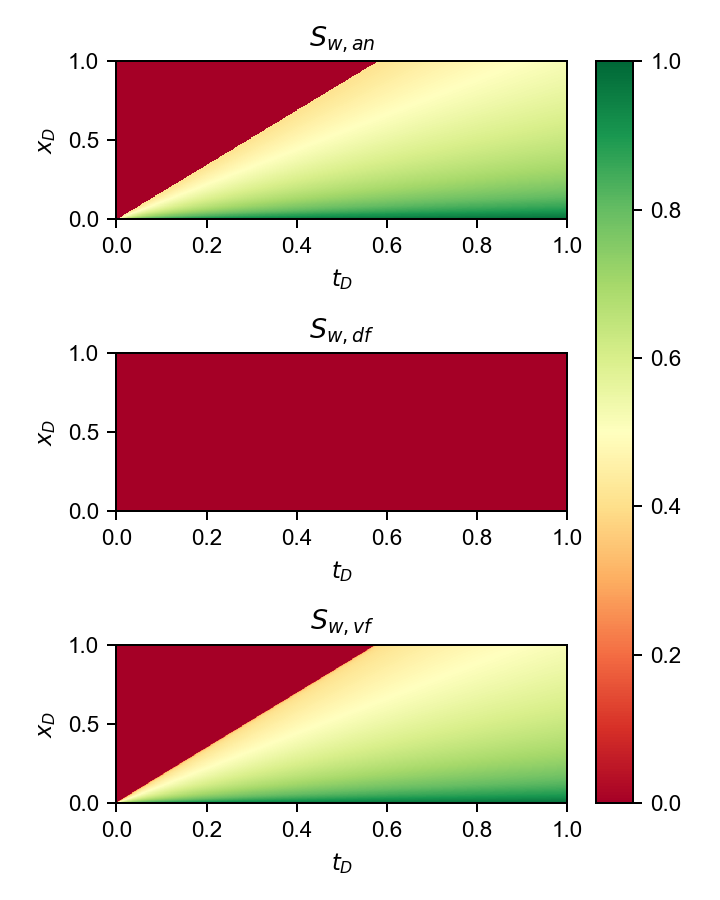

In [8]:
# Plot 2D estatico
fig1, ax1 = plt.subplots(3, 1, figsize=(4, 5), dpi=180)
norm = mpl.colors.Normalize(0, 1)
c = ax1[0].pcolormesh(t, x, sw.T, cmap='RdYlGn', norm=norm)
ax1[1].pcolormesh(t, x, u.T, cmap='RdYlGn', norm=norm)
ax1[2].pcolormesh(t, x, u_vf.T, cmap='RdYlGn', norm=norm)

# Ajustes do plot
ax1[0].set_title('$S_{w,an}$')
ax1[1].set_title('$S_{w,df}$')
ax1[2].set_title('$S_{w,vf}$')

# Legenda e eixos
for i in range(len(ax1)):
    ax1[i].set_ylabel('$x_D$')
    ax1[i].set_xlabel('$t_D$')
    ax1[i].set_ylim(0, 1)
    ax1[i].set_xlim(0, 1)
fig1.tight_layout()
fig1.colorbar(c, ax=ax1)
fig1.savefig('nt'+str(int(nt))+'-nx'+str(int(nx))+'-'+caso+'-M'+str(M)+'-geral.png')


<IPython.core.display.Javascript object>


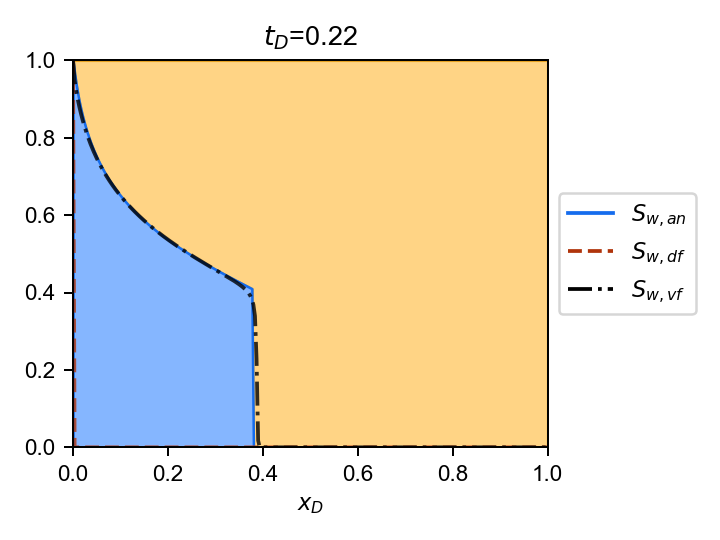

In [9]:
# Animacao
saves = np.array([0.25, 0.5, 0.75])
fig2, ax2 = plt.subplots(figsize=(4, 3), dpi=180)
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
box = ax2.get_position()
ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])

def anifunc(frame):
    # Plot
    ax2.clear()
    ax2.fill_between(x, sw[frame]+so[frame], sw[frame], ec='#e6a122', fc='#ffd485')
    ax2.fill_between(x, sw[frame], ec='#156ced', fc='#85b6ff')
    ax2.plot(x, u[frame], c='#b0340b', ls='--', alpha=0.8)
    ax2.plot(x, u_vf[frame], c='k', ls='-.', alpha=0.8)
    
    # Ajustes do plot
    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 1)
    ax2.set_xlabel('$x_D$')
    ax2.set_title('$t_D$={t:.2f}'.format(t=frame/nt))
    
    # Legenda
    legenda = [Line2D([0], [0], color='#156ced', label='$S_{w,an}$'),
               Line2D([0], [0], color='#b0340b', ls='--', label='$S_{w,df}$'),
               Line2D([0], [0], color='k', ls='-.', label='$S_{w,vf}$')]
    ax2.legend(handles=legenda, loc='center left', bbox_to_anchor=(1, 0.5))
    fig2.tight_layout()
    if frame in saves*nt:
        fig2.savefig('nt'+str(int(nt))+'-nx'+str(int(nx))+'-'+caso+'-M'+str(M)+'-frame'+str(int(frame*100/nt))+'.png')
    return []


ani = FuncAnimation(fig2, anifunc, frames=skipp(t, 10), interval=17)